# Recommendation Systems

#1

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import Counter
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import plotly.express as px

In [2]:
phone1 = pd.read_csv('phone_user_review_file_1.csv', encoding= 'latin1')
print(phone1.shape)
phone1.head()

(374910, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [3]:
phone2 = pd.read_csv('phone_user_review_file_2.csv', encoding= 'latin1')
print(phone2.shape)
phone2.head()

(114925, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [4]:
phone3 = pd.read_csv('phone_user_review_file_3.csv', encoding= 'latin1')
print(phone3.shape)
phone3.head()

(312961, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [5]:
phone4 = pd.read_csv('phone_user_review_file_4.csv', encoding= 'latin1')
print(phone4.shape)
phone4.head()

(98284, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [6]:
phone5 = pd.read_csv('phone_user_review_file_5.csv', encoding= 'latin1')
print(phone5.shape)
phone5.head()

(350216, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [7]:
phone6 = pd.read_csv('phone_user_review_file_6.csv', encoding= 'latin1')
print(phone6.shape)
phone6.head()

(163837, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


In [8]:
Smartphone = pd.concat([phone1,phone2,phone3,phone4,phone5,phone6],axis=0)

In [9]:
Smartphone.head()
print(Smartphone.shape)

(1415133, 11)


In [10]:
Smartphone.to_csv('Smartphone.csv', index=False)

In [11]:
Smartphone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


In [12]:
Smartphone.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [13]:
Smartphone.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [14]:
Smartphone.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [15]:
Smartphone.isna()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
163832,False,False,False,False,False,False,False,False,False,False,False
163833,False,False,False,False,False,False,False,False,False,False,False
163834,False,False,False,False,False,False,False,False,False,False,False
163835,False,False,False,False,False,False,False,False,False,False,False


In [16]:
Smartphone1 = Smartphone.copy()

In [17]:
Smartphone1.describe()

,score,score_max
count,1.351644e+06,1351644.0
mean,8.007060e+00,10.0
std,2.616121e+00,0.0
min,2.000000e-01,10.0
25%,7.200000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


In [18]:
Smartphone1.isnull().values.any()

True

In [19]:
nullvalues = Smartphone1.isnull().sum()
print (nullvalues)

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64


In [20]:
import warnings
warnings.filterwarnings('ignore')
Smartphone1 = Smartphone1.fillna(Smartphone1.median())
Smartphone1 = Smartphone1.dropna()
Smartphone1['score'] = Smartphone1['score'].astype(int) 
Smartphone1['score_max'] = Smartphone1['score_max'].astype(int)
Smartphone1.shape

(1336416, 11)

In [21]:
Smartphone1 = Smartphone1.drop_duplicates()

In [22]:
Smartphone1.shape

(1331600, 11)

In [23]:
Smartphone1.drop(['phone_url','date','lang','country','source','domain','score_max','extract'], axis = 1, inplace = True)

#2

In [24]:
Smartphone2 = Smartphone1.copy()

In [25]:
Smartphone2.shape

(1331600, 3)

In [26]:
data = Smartphone2.sample(n=1000000, random_state=612)

In [27]:
data.groupby('product')['score'].mean().sort_values(ascending=False).head()

product
Nokia 5310 Xpress Music, sakura red sim-free unbranded kein Vertrag    10.0
Oppo Find 5 X909 16 Gb White Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½                          10.0
Sony Ericsson W880i Prepay Mobile Phone On Orange                      10.0
Huawei Mobiltelefoner Mate 8 Dual SIM 32GB                             10.0
Huawei NOVA 4G MYSTIC SILVER                                           10.0
Name: score, dtype: float64

In [28]:
(data['author'].value_counts()).head()

Amazon Customer    57765
Cliente Amazon     14564
e-bit               6309
Client d'Amazon     5720
Amazon Kunde        3624
Name: author, dtype: int64

In [29]:
data['product'].value_counts().head()

Lenovo Vibe K4 Note (White,16GB)     3908
Lenovo Vibe K4 Note (Black, 16GB)    3234
OnePlus 3 (Graphite, 64 GB)          3128
OnePlus 3 (Soft Gold, 64 GB)         2643
Huawei P8lite zwart / 16 GB          1994
Name: product, dtype: int64

In [30]:
data1 = pd.DataFrame(columns=['author', 'a_count'])
data1['author']=data['author'].value_counts().index.tolist() 
data1['a_count'] = list(data['author'].value_counts() > 50)

In [31]:
index_names = data1[ data1['a_count'] == False ].index 
data1.drop(index_names, inplace = True) 
data1

,author,a_count
0,Amazon Customer,True
1,Cliente Amazon,True
2,e-bit,True
3,Client d'Amazon,True
4,Amazon Kunde,True
...,...,...
674,kenankilic,True
675,missing,True
676,Dee,True
677,Rohit,True


In [32]:
data2 = pd.DataFrame(columns=['product', 'p_count'])
data2['product']=data['product'].value_counts().index.tolist() 
data2['p_count'] = list(data['product'].value_counts() > 50)

In [33]:
index_names = data2[ data2['p_count'] == False ].index 
data2.drop(index_names, inplace = True)

In [34]:
data2

,product,p_count
0,"Lenovo Vibe K4 Note (White,16GB)",True
1,"Lenovo Vibe K4 Note (Black, 16GB)",True
2,"OnePlus 3 (Graphite, 64 GB)",True
3,"OnePlus 3 (Soft Gold, 64 GB)",True
4,Huawei P8lite zwart / 16 GB,True
...,...,...
4341,"BLU VIVO IV Full HD Super Amoled,13MP,(16GB+2G...",True
4342,Motorola Moto E 2nd Generation 4G LTE White XT...,True
4343,Nokia 6303i classic,True
4344,"Apple iPhone 3G Smartphone (8,9 cm (3,5 Zoll) ...",True


In [35]:
data3 = data[data['product'].isin(data2['product'])] 
data3

,score,author,product
104246,10,Paul B,Samsung i897 Captivate Android Smartphone Gala...
78693,10,Yuvraj,"Blu Win JR LTE (Grey, 4GB)"
8816,2,Joyce D. Pratt,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl..."
116623,10,David B,Samsung S3350 Chat 335 Sim Free Mobile Phone
35333,10,Sebastian,"Samsung E1190 Handy (3,6 cm (1,43 Zoll) Displa..."
...,...,...,...
87173,8,Javier,Huawei Ascend Y330 - Smartphone libre Android ...
281625,8,Patrix,"Huawei Ascend G510 Smartphone Touch, Fotocamer..."
110881,2,Amazon Customer,"Apple iPhone 5C Factory Unlocked Cellphone, 8G..."
36197,10,majere1975,"Samsung Smartphone Galaxy S Advance, Display 4..."


In [36]:
data4 = data3[data3['author'].isin(data1['author'])]

In [37]:
data4

,score,author,product
35333,10,Sebastian,"Samsung E1190 Handy (3,6 cm (1,43 Zoll) Displa..."
290678,8,sara,"Samsung SM-N910F Galaxy Note 4 Smartphone, 32 ..."
101404,10,ÐÐ²Ð³ÐµÐ½Ð¸Ð¹,Sony Xperia Z1 Compact (Ð»Ð°Ð¹Ð¼)
223332,8,Amazon Customer,Motorola Moto G 3rd Generation SIM-Free Smartp...
361379,10,e-bit,Smartphone Motorola Moto G 4 Play XT1603
...,...,...,...
21110,2,Amazon customer,Tracfone Motorola Moto E Android Prepaid Phone...
321740,8,Qantas,Sony Ericsson K810i Cyber-shot
269553,9,Capyto,Samsung M150 Cep Telefonu
87173,8,Javier,Huawei Ascend Y330 - Smartphone libre Android ...


In [38]:
data4.shape

(108983, 3)

In [39]:
ratings_mean_count = pd.DataFrame(data.groupby('product')['score'].mean()) 

In [40]:
ratings_mean_count['rating_counts'] = pd.DataFrame(data.groupby('product')['score'].count())

#3

In [41]:
ratings_mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False]).head()

,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,144
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0,132
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.0,131
Samsung Smartphone Galaxy Win Duos Branco Desbloqueado Dual Chip CÃ¢mera 5MP Processador Quad Core 1.2 Ghz Android 4.1 3G Wi- Fi e MemÃ³ria 8GB,10.0,127
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.0,126


In [42]:
data_popularitybasedmodel = data
data

,score,author,product
104246,10,Paul B,Samsung i897 Captivate Android Smartphone Gala...
78693,10,Yuvraj,"Blu Win JR LTE (Grey, 4GB)"
109329,10,Pankaj Bhalla,"Lenovo P780 (Deep Black, 4GB)"
64164,6,Bgrazina,Samsung Galaxy XCover 2
8816,2,Joyce D. Pratt,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl..."
...,...,...,...
70406,4,Dudls,Nokia 301 Dual
16189,8,Cintaaa__,LG Viewty KU990
99081,10,ALBERT M. MASSILLON,BLU Dash JR K Smartphone - Unlocked - Black
102484,2,Amazon Customer,Samsung Galaxy S6 SM-G920F 32GB (FACTORY UNLOC...


#4

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from collections import defaultdict

In [44]:
columns_titles = ['author','product','score']
Smartphone3 = Smartphone2.reindex(columns=columns_titles)

In [45]:
Smartphone4 = Smartphone3.sample(n=5000, random_state=612)

In [46]:
! pip install scikit-surprise

In [47]:
from sklearn import preprocessing
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

#SVD

In [48]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(Smartphone4,reader = reader)

In [49]:
trainset = data.build_full_trainset()

In [50]:
trainset.ur

defaultdict(list,
            {0: [(0, 10.0)],
             1: [(1, 10.0)],
             2: [(2, 10.0)],
             3: [(3, 6.0)],
             4: [(4, 2.0)],
             5: [(5, 10.0)],
             6: [(6, 10.0), (1363, 10.0)],
             7: [(7, 10.0)],
             8: [(8, 8.0), (465, 9.0)],
             9: [(9, 8.0)],
             10: [(10, 10.0)],
             11: [(11, 2.0)],
             12: [(12, 8.0)],
             13: [(13, 8.0)],
             14: [(14, 10.0)],
             15: [(15, 10.0)],
             16: [(16, 2.0)],
             17: [(17, 8.0)],
             18: [(18, 10.0)],
             19: [(19, 9.0)],
             20: [(20, 8.0)],
             21: [(21, 10.0),
              (909, 9.0),
              (2202, 6.0),
              (2551, 10.0),
              (3378, 9.0),
              (3614, 10.0)],
             22: [(22, 2.0)],
             23: [(23, 10.0)],
             24: [(24, 8.0)],
             25: [(25, 10.0)],
             26: [(26, 10.0)],
             27:

In [51]:
algo = SVD()
algo.fit(trainset)

In [52]:
testset = trainset.build_anti_testset()

In [53]:
predictions = algo.test(testset)

In [54]:
def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
        
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [55]:
top_n = get_top_n(predictions, n=5)

In [56]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Paul B ['Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia]', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]']
Yuvraj ['OnePlus 3 (Graphite, 64 GB)', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Nokia C1-02 Sim Free Mobile Phone - Black']
Pankaj Bhalla ['OnePlus 3 (Graphite, 64 GB)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici di

?????????????????????? ???????????? ['Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia]']
bluejex ['Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'OnePlus 3 (Graphite, 64 GB)', 'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Samsung Galaxy S7 32GB (T-Mo

ÐÐ½ÑÐ¾Ð½ÑÑ ÐÐ½ÑÐ¾Ð½ ['Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]', 'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Samsung Galaxy J5', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)']
selena ['Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia]', 'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)']
dilekh ['Huawei P8 lite Smartphone, Display 5.0" IPS, Dual 

Mareike Wagner ['Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)', 'Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]', 'Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia]']
robert ['OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'OnePlus 3 (Graphite, 64 GB)', 'Samsung Galaxy S7 32GB (T-Mobile)']
rony peterson ['Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memor

txmate ['Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'OnePlus 3 (Graphite, 64 GB)', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G)']
kal4ak ['OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'OnePlus 3 (Graphite, 64 GB)', 'Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia]', 'Nokia C2-01 Sim Free Mobile Phone 3G - Black']
Lee ['Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'S

mujj ['Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia]']
J. Mazur "pook's" ['OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Xiaomi Red rice 1S - Smartphone libre Android (pantalla 4.7", cÃ¡mara 8 Mp, 8 GB, Quad-Core 1.6 GHz, 1 GB RAM), negro', 'OnePlus One (Sandstone Black, 64GB)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)']
Chronic Buyer ['OnePlus 3 (Graphite, 64 GB)', 'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memo

In [57]:
print("SVD Model : Test Set")
accuracy.rmse(predictions, verbose=True)

SVD Model : Test Set
RMSE: 0.3370


0.33696406821888364

In [58]:
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

{'test_rmse': array([2.5070877 , 2.60069031, 2.65334828]),
 'fit_time': (0.2075345516204834, 0.18001627922058105, 0.15694546699523926),
 'test_time': (0.0, 0.0, 0.01913142204284668)}

In [59]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0


bf = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
bf['Iu'] = bf.uid.apply(get_Iu)
bf['Ui'] = bf.iid.apply(get_Ui)
bf['err'] = abs(bf.est - bf.rui)
best_predictions = bf.sort_values(by='err')[:10]
worst_predictions = bf.sort_values(by='err')[-10:]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
12484165,Ed,Nokia 6110 Navigator,8.0086,8.0086,{'was_impossible': False},1,1,1.645381e-08
8796687,TYNOUNOU29,LG Optimus G Pro E980 32GB Unlocked GSM 4G LTE...,8.0086,8.0086,{'was_impossible': False},1,1,4.990011e-08
15321266,Dave,Sony Ericsson Satio,8.0086,8.0086,{'was_impossible': False},1,1,8.042572e-08
13708123,exelancemree,LG (514) Optimus L5 Dual E615,8.0086,8.0086,{'was_impossible': False},1,1,8.888818e-08
3306692,tamara,Samsung Galaxy S3 mini Smartphone dÃ©bloquÃ© 4...,8.0086,8.0086,{'was_impossible': False},1,1,1.598189e-07
8081655,Feyfant,Samsung Galaxy Nexus | Black,8.0086,8.0086,{'was_impossible': False},1,2,2.071246e-07
3227106,zex168,Nokia 225 Dual SIM blanc dÃ©bloquÃ© logiciel o...,8.0086,8.0086,{'was_impossible': False},1,1,2.297365e-07
4885288,ÐÐ½Ð°ÑÐ¾Ð»Ð¸Ð¹,"SAMSUNG Galaxy On7 (Gold, 8 GB)",8.0086,8.0086,{'was_impossible': False},1,1,2.574159e-07
16675964,Wil,Elephone P8000 - Smartphone libre Android (pan...,8.0086,8.0086,{'was_impossible': False},1,1,2.730782e-07
13674509,Ute Morgenstern,Samsung SGH J600,8.0086,8.0086,{'was_impossible': False},1,1,3.293365e-07


#KNN Item based

In [60]:
reader = Reader(rating_scale=(1, 10))
data_2 = Dataset.load_from_df(Smartphone4,reader = reader)

In [61]:
trainset_I, testset_I = train_test_split(data_2, test_size=.15)

In [62]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset_I)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [63]:
test_pred_I = algo.test(testset_I)

In [64]:
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_I, verbose=True)

Item-based Model : Test Set
RMSE: 2.5567


2.556679767964452

#KNN User based

In [65]:
reader = Reader(rating_scale=(1, 10))
data_U = Dataset.load_from_df(Smartphone4,reader = reader)

In [66]:
trainset_U, testset_U = train_test_split(data_U, test_size=.15)

In [67]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset_U)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [68]:
uid = 'Frances DeSimone'  
iid = 'Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce.' 

In [69]:
pred = algo.predict(uid, iid, verbose=True)

user: Frances DeSimone item: Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce. r_ui = None   est = 8.03   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [70]:
test_pred_U = algo.test(testset_U)

In [71]:
print("User-based Model : Test Set")
accuracy.rmse(test_pred_U, verbose=True)

User-based Model : Test Set
RMSE: 2.6211


2.6211370116245036

#5

In [79]:
knn_user_rmse = round(accuracy.rmse(test_pred_U))
svd_score_rmse = round(accuracy.rmse(predictions),2)
knn_items_rmse = round(accuracy.rmse(test_pred_I))

RMSE: 2.6211
RMSE: 0.3370
RMSE: 2.5567


<AxesSubplot:>

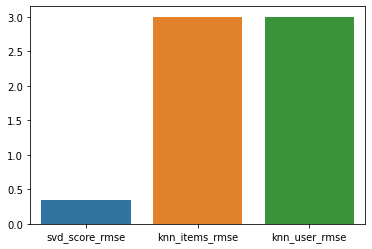

In [80]:
sns.barplot(x=['svd_score_rmse','knn_items_rmse', 'knn_user_rmse'],y=[svd_score_rmse,knn_items_rmse, knn_user_rmse])

In [ ]:
knn_user based got the best accuracy score

#7

Data Inferences
1. KNN user and KNN Item based accuracy scores are simillar.
2. Nokia 6110 Navigator has got best predictions.
3. Based on popularity the Samsung Galaxy Note5 is topper of the gadgets.
4. Lot costumers prefer buying phones on Amazon

#8

In [82]:
top_5 = get_top_n(test_pred_I,5)
print('recommendations of top 5 products for test users: \n')
for key,value in top_5.items(): print(key,'-> ',value,'\n')


recommendations of top 5 products for test users: 

Wilbur Hartranft ->  [('SVP S580 Capacitive Unlocked 5 Inch Dual SIM Dual Camera Touch Screen Smart Phone', 7.992235294117647)] 

Chris S. ->  [('Samsung Galaxy S II Skyrocket I727 16GB AT&T 4G LTE Smartphone - White', 7.992235294117647)] 

Luis Filipe ->  [('Motorola Smartphone Motorola Moto E Dual Chip Desbloqueado Tim Android 4.4 4.3 4GB 3G Wi-Fi CÃ¢mera 5MP GPS', 7.992235294117647)] 

FRANCESCA MANCA ->  [('Apple iPhone 4S Smartphone, Nero [Italia]', 7.992235294117647)] 

adaildo ->  [('Smartphone Samsung Galaxy S4 Mini Duos Preto com Dual Chip, Tela 4.3", Android 4.2, CÃ¢mera 8MP e Processador Dual Core de 1.7 Ghz - Claro', 7.992235294117647)] 

AnÃ´nimo ->  [('Nokia Smartphone Nokia Lumia 710 - Desbloqueado Tim - Preto - GSM - CÃ¢mera 5 MP com Led Flash - 3G, Wi-Fi - MemÃ³ria interna de 8GB e grÃ¡tis 7GB de armazenamento no Sky Drive Tela Touch 3.7- Windows Phone 7.5 - Processador 1.4GHz - GPS - Filma em HD - MP3 Player ', 7.992

#10
It bascially used items which are in trend. If a new user signs up into netflix he/she might me get recommended stranger things as it has been most watched series in the past three years

#11
So when a user has completed watching stranger things. The user gets recommended other sci fi tv series

#12
Deep learning methods
Hybrid filtering
Gold standard similarity computation technique